In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math
import json #to write dict with parameters

import GrowYourIC
from GrowYourIC import positions, geodyn, geodyn_trg, geodyn_static, plot_data, data

plt.rcParams['figure.figsize'] = (8.0, 3.0) #size of figures
cm = plt.cm.get_cmap('viridis')
cm2 = plt.cm.get_cmap('winter')

In [2]:
## real data set
data_set = data.SeismicFromFile("../GrowYourIC/data/WD11.dat")
residual = data_set.real_residual()

velocity_center = [0., -80]#center of the eastern hemisphere
r, t, p = data_set.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

# Figure S1

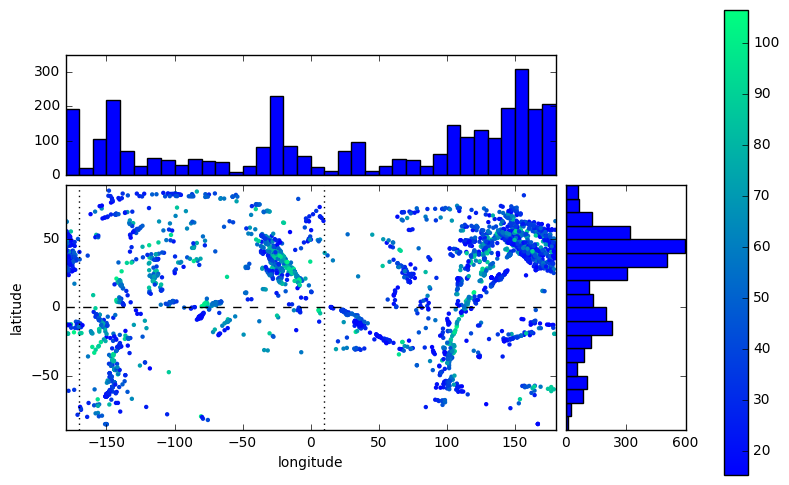

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

color = dist
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(p,t, c=1221*(1-r), linewidth=0, s=10, cmap=plt.cm.get_cmap('winter'))  #c=dist>90
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

cbar = fig.colorbar(sc)

#to add histograms to see the actual repartition. Please see http://matplotlib.org/examples/axes_grid/scatter_hist.html
divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)
binwidth = 10.
limX = (int(180./binwidth) + 1)*binwidth
limY = (int(90./binwidth) + 1)*binwidth
binsX = np.arange(-limX, limX + binwidth, binwidth)
binsY = np.arange(-limY, limY + binwidth, binwidth)
axHistx.hist(p, bins=binsX)
axHisty.hist(t, bins=binsY, orientation='horizontal')
#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 100, 200, 300])
#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 300, 600])
ax.set_aspect('equal')
ax.axis([-180, 180, -90, 90])
#ax.plot([-180,180],[15,15], 'k')
#ax.plot([-180,180],[-15,-15],'k')
ax.plot([-180,180],[0,0],'k--')
ax.plot([10,10],[-90,90],'k:')
ax.plot([-170,-170],[-90,90],'k:')


# Figure S2

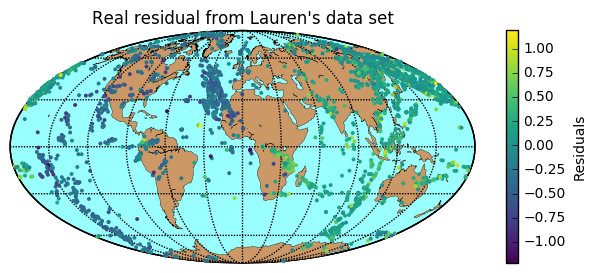

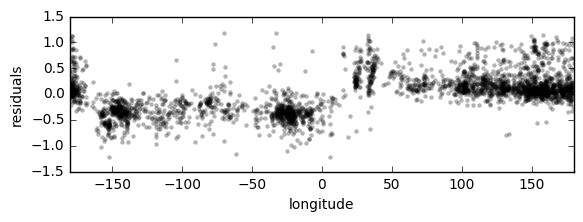

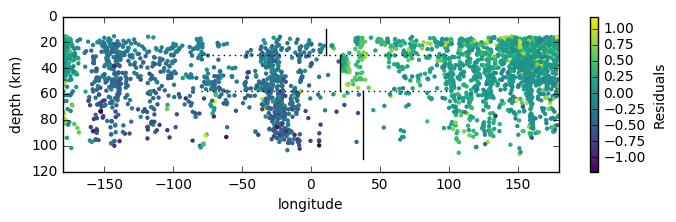

In [16]:
m, fig = plot_data.setting_map() 
# cm = plt.cm.get_cmap('seismic')
x, y = m(p, t)
sc = m.scatter(x, y, c=residual, s=8, zorder=10, cmap=cm, edgecolors='none')
plt.title("Real residual from Lauren's data set")
cbar1 = plt.colorbar(sc)
cbar1.set_label("Residuals")
plt.savefig("figures/WD11_maps.pdf")
## phi and distance plots

fig, ax = plt.subplots(sharey=True, figsize=(6.5, 2))
cm2 = plt.cm.get_cmap('winter')
sc1 = ax.scatter(p, residual, c="black", s=10,cmap=cm2, linewidth=0, alpha=0.3)
ax.set_xlabel("longitude")
ax.set_ylabel("residuals")
ax.set_xlim([-180, 180])
#sc2 = ax[1].scatter(dist, residual, c="k", s=10,cmap=cm2, linewidth=0)
#ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
#ax[1].set_xlim([0, 180])
#fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
#cbar2 = fig.colorbar(sc2)
#cbar2.set_label("latitude: abs(theta)")
plt.savefig("test.pdf")

fig, ax = plt.subplots(figsize=(8, 2))
rICB_dim = 1221. #in km
sc=ax.scatter(p,rICB_dim*(1.-r), c=residual, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
cbar.set_label("Residuals")
ax.set_xlabel("longitude")
ax.set_ylabel("depth (km)")
ax.plot([11,11],[10,30], 'k')
ax.plot([21,21],[30,58], 'k')
ax.plot([38,38],[58,110], 'k')
ax.plot([-80,100], [30,30], 'k:')
ax.plot([-80,100], [58,58], 'k:')
